https://app.neptune.ai/arno/master-aa/e/AA-535
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
https://app.neptune.ai/arno/master-aa/e/AA-536
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
https://app.neptune.ai/arno/master-aa/e/AA-537
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!
https://app.neptune.ai

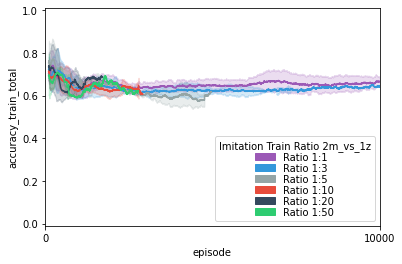

In [3]:
from dotmap import DotMap
import json
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import neptune.new as neptune
import os

"""
High quality plots for evaluation.

author(s): Arnold Unterauer
"""



#############
# qtran


tr_ratio_1 = [535, 536, 537, 539, 540]
tr_ratio_3 = [551, 552, 553, 554, 555]
tr_ratio_5 = [546, 547, 548, 549, 550]
tr_ratio_10 = [520, 521, 522, 523, 524]
tr_ratio_20 = [525, 526, 527, 528, 529]
tr_ratio_50 = [530, 531, 532, 533, 534]

tr_ratio_10_sim = [591, 592, 593, 594, 595]
tr_ratio_10_sim_obvious = [596, 597, 598, 599, 600]

runs = [tr_ratio_1, tr_ratio_3, tr_ratio_5, tr_ratio_10, tr_ratio_20, tr_ratio_50]
labels = ["Ratio 1:1", "Ratio 1:3", "Ratio 1:5", "Ratio 1:10", "Ratio 1:20", "Ratio 1:50"]

#############

titel = "Imitation Train Ratio 2m_vs_1z"



only_ant = [358, 359, 360, 361, 362]
only_mimic = [363, 364, 365, 366, 367]
split_ant_before = [374, 375, 376, 377, 378]
sim_train = [381, 382, 383, 384, 385]
sim_train_only_ant = [386, 387, 388, 389, 390]

hidden = [410, 411, 412, 413, 414]
hidden_split = [415, 416, 417, 418, 419]

qtran = [292, 296, 297, 298, 299]

ignore_reward_in_label = [430, 431, 432, 433, 434]

weight_label_only_gan = [425, 426, 427, 428, 429]

weight_label = [420, 421, 422, 423, 424]

# runs = [hidden, hidden_split, weight_label, weight_label_only_gan, ignore_reward_in_label, only_ant, only_mimic]
# labels = ["Hidden", "Hidden consecutively", "Label weighted", "Label weighted only GAN", "Ignore rewards in label", "Obvious", "Imitation"]


# runs = [hidden, hidden_split, only_mimic]
# labels = ["Hidden Agents", "Hidden loss consecutively", "Only imitation"]

value_name = 'accuracy_train_total'

# titel = "Training QTRAN 2m_vs_1z 1P/1A"

x_range = [-10, 10000]
# y_range = [-0.1, 22]
y_range = [-0.01, 1.01]
x_ticks = [0 , 10001]
x_tick_steps = 10000

legend_location = "lower right"
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#43a16f"]


with open('neptune_auth.json', 'r') as f:
    neptune_auth = json.load(f)
    neptune_auth = DotMap(neptune_auth)

def get_df_from_neptune(run_id):
    neptune_run = neptune.init(project=neptune_auth.project, api_token=neptune_auth.api_token, mode="read-only", run="AA-{}".format(run_id))
    epoch_return = neptune_run[value_name].fetch_values(include_timestamp=False)['value']
    df = pd.DataFrame()
    df["x"] = range(1, len(epoch_return) + 1)
    df[value_name] = epoch_return.rolling(100).mean()
    neptune_run.stop()
    return df

dataframes = []
for run in runs:
    dataframe = []
    for nep_id in run:
        dataframe.append(get_df_from_neptune(nep_id))
    dataframe = pd.concat(dataframe, ignore_index=True)
    dataframes.append(dataframe)

current_palette = sns.color_palette(flatui)

plt = None
for i, dataframe in enumerate(dataframes):
    plt = sns.lineplot(x="x", y=value_name, data=dataframe, color=current_palette[i], err_style='band', ci="sd")

plt.set_xlabel('episode')
plt.set_ylabel(value_name)
plt.set_xticks(np.arange(x_ticks[0], x_ticks[1], step=x_tick_steps))

colors = []
if len(labels) == 0:
    labels = runs
for i, label in enumerate(labels):
    colors.append(mpatches.Patch(color=current_palette[i], label='{}'.format(label)))

leg = plt.legend(handles=colors, labelspacing=0.1, loc=legend_location)
leg.set_title(titel)

plt.set(xlim=(x_range[0], x_range[1]))
plt.set(ylim=(y_range[0], y_range[1]))
fig = plt.get_figure()

# fig.savefig('plot - training.png', dpi=300, bbox_inches="tight")

plot_dir = os.path.join(os.getcwd(), 'plots')
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
fig.savefig(os.path.join(plot_dir, 'plot - training.png'.format(titel)), dpi=300, bbox_inches="tight")
# fig.savefig(os.path.join(plot_dir, 'plot - {}.png'.format(titel)), dpi=300, bbox_inches="tight")

# runs = [[71, 72, 73, 74, 75], [127, 128, 129, 130, 131], [160, 161, 162, 163, 164], [133, 134, 135, 136, 137], [155, 156, 157, 158, 159]]
# labels = ["Pure Attack Learner", "Random Learner", "Pure Imitation Learner", "One Hot Actions", "Hidden Attack Learner"]

# random = [127, 128, 129, 130, 131]
# ant_at_front = [165, 166, 167, 168, 169]
# ant_at_end = [155, 156, 157, 158, 159]
# pure_attacker = [71, 72, 73, 74, 75]
# pure_imitation = [160, 161, 162, 163, 164]
# one_hot = [133, 134, 135, 136, 137]
# max_q = [63, 64, 65, 67,68]
# hidden_attacker = [170, 171, 172, 173, 174]

# normal = [227, 228, 229, 230, 231]
# hidden = [280, 281, 282, 283, 284, 285, 286, 287, 288, 289]

# runs = [hidden]
# labels = ["Hidden Attacker"]